## Heatlcare pathways analysis: Optimal Matching and Classification 

###  Chargement des données et des packages

In [56]:
# Package names
packages <- c("TraMineR", "TraMineRextras", "seqhandbook", "cluster", "WeightedCluster", "factoextra", 'fossil','gridExtra',
             'mcclust', 'ramify')
install.packages(packages)



  There are binary versions available but the source versions are later:
                binary source needs_compilation
TraMineR         2.2-1  2.2-2              TRUE
TraMineRextras   0.6.1  0.6.2              TRUE
WeightedCluster  1.4-1  1.6-0              TRUE

  Binaries will be installed


Warning message:
"packages 'TraMineR', 'TraMineRextras', 'seqhandbook', 'cluster', 'WeightedCluster', 'factoextra', 'fossil', 'gridExtra', 'mcclust', 'ramify' are in use and will not be installed"

In [57]:
library(TraMineR)
library(TraMineRextras)
library(factoextra)
library(seqhandbook)
library(cluster)
library(WeightedCluster)
library(fossil)
library(gridExtra)
library(mcclust)
library(ramify)

### Descriptive analysis of MVAD dataset

**Creating a state sequence object**

In [3]:
#------------------------------------------------------------
#loading data
data(mvad) 
print(seqstatl(mvad[, 17:86])) # alphabet: list of states

#----------------------------------------------------------
# Creating a state sequence object
mvad.alphabet <- c("employment", "FE", "HE", "joblessness", "school", 
    "training")
mvad.labels <- c("employment", "further education", "higher education", 
    "joblessness", "school", "training")
mvad.scodes <- c("EM", "FE", "HE", "JL", "SC", "TR")
mvad.seq <- seqdef(mvad, 17:86, alphabet = mvad.alphabet, states = mvad.scodes, 
    labels = mvad.labels, xtstep = 6)


[1] "employment"  "FE"          "HE"          "joblessness" "school"     
[6] "training"   


 [>] state coding:
       [alphabet]  [label]  [long label] 
     1  employment  EM       employment
     2  FE          FE       further education
     3  HE          HE       higher education
     4  joblessness JL       joblessness
     5  school      SC       school
     6  training    TR       training
 [>] 712 sequences in the data set
 [>] min/max sequence length: 70/70


**Visualizing sequences**

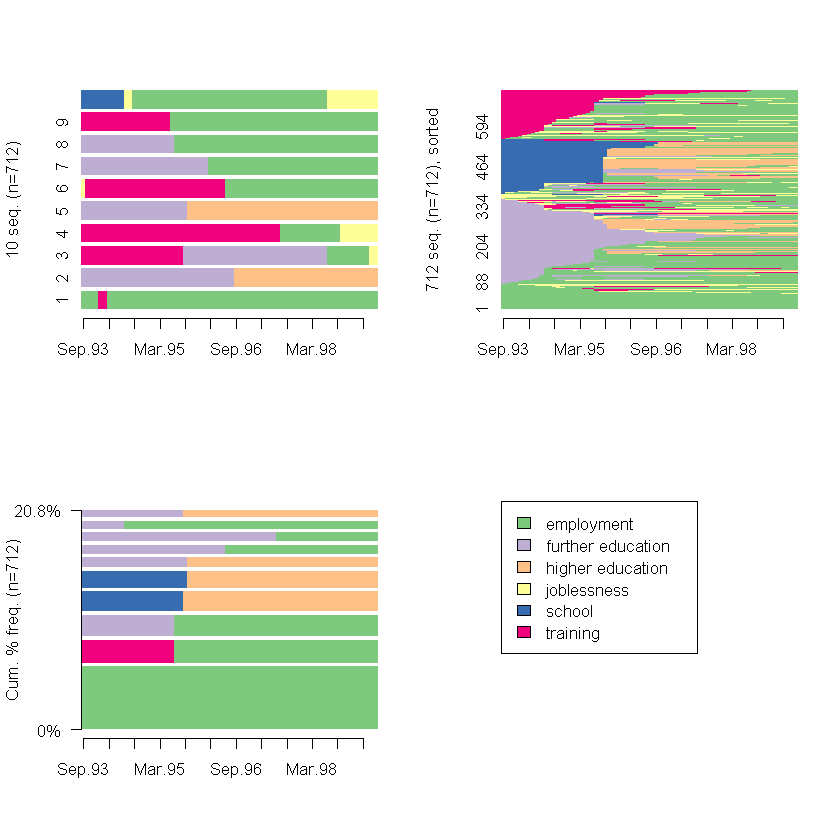

In [4]:
#------------------------------------------------------------
par(mfrow = c(2, 2))
#Plot the first 10 sequences in the mvad.seq sequence object.
seqiplot(mvad.seq, with.legend = FALSE, border = NA)
#Plot all the sequences in the data set, sorted by states from start
seqIplot(mvad.seq, sortv = "from.start", with.legend = FALSE)
#Plot the 10 most frequent sequences.
seqfplot(mvad.seq, with.legend = FALSE, border = NA)
#Plot the legend for the state colors
seqlegend(mvad.seq)

**Visualizing some descriptive analysis**

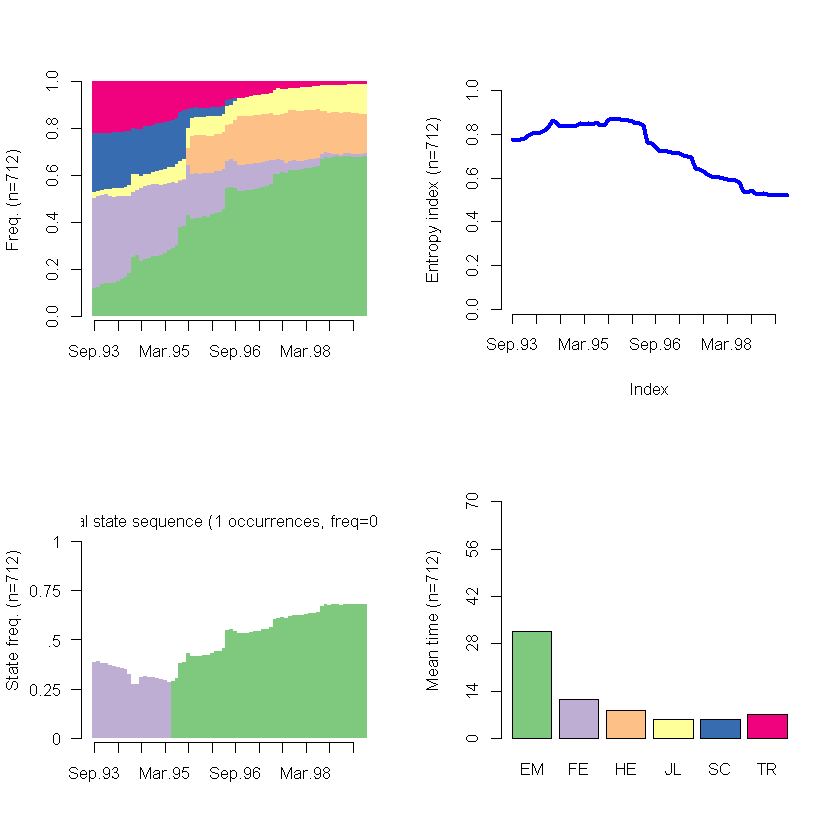

In [5]:
#------------------------------------------------------------
par(mfrow = c(2, 2))
#plot the state distributions by time points
seqdplot(mvad.seq, with.legend = FALSE, border = NA)
#plot the transversal entropy index
seqHtplot(mvad.seq)
#Plot the sequence of modal states of the transversal state distributions
seqmsplot(mvad.seq, with.legend = FALSE, border = NA)
#Plot the mean time spent in each state of the alphabet.
seqmtplot(mvad.seq, with.legend = FALSE)

## Clustering 

**Compute Optimal Matching distance**

In [6]:
#------------------------------------------------------------
#Compute the optimal matching distances using substitution costs based on transition rates observed in the data 
#and a 1 indel cost. 
dist.om1 <- seqdist(mvad.seq, method = "OM", indel = 1, sm = "TRATE")

 [>] 712 sequences with 6 distinct states
 [>] Computing sm with seqcost using  TRATE
 [>] creating substitution-cost matrix using transition rates ...
 [>] computing transition probabilities for states EM/FE/HE/JL/SC/TR ...
 [>] 490 distinct  sequences 
 [>] min/max sequence lengths: 70/70
 [>] computing distances using the OM metric
 [>] elapsed time: 3.3 secs


**Hierarchical clustering**

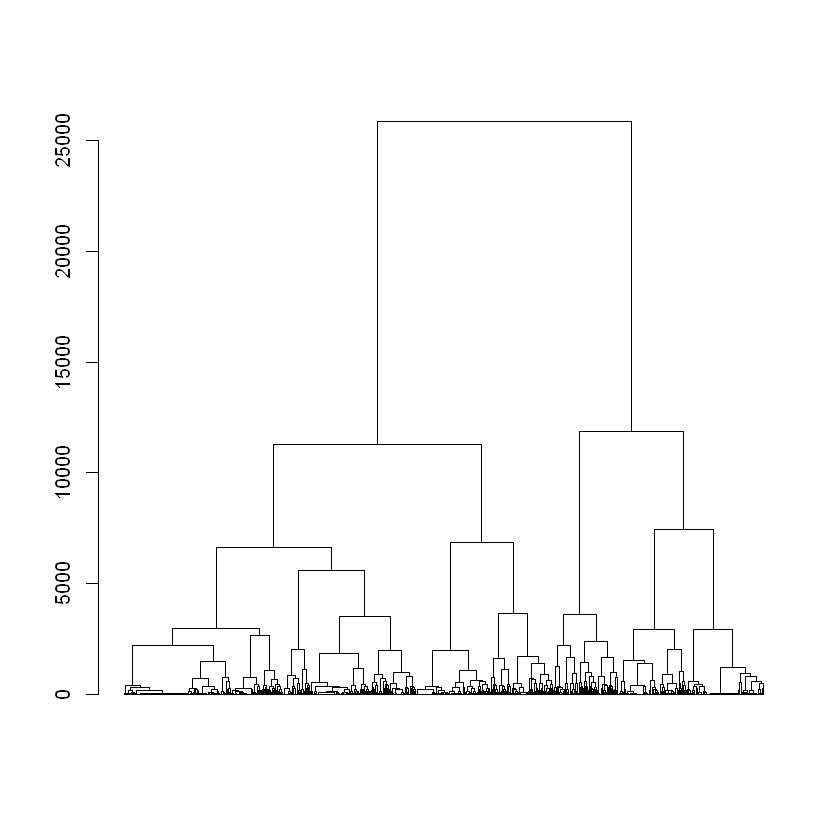

In [7]:
#------------------------------------------------------------
#build a Ward hierarchical clustering of the sequences from the optimal matching distances
clusterward1 <- hclust(dist(dist.om1), method = "ward.D2")
#plot the dendrogram
plot(as.dendrogram(clusterward1), leaflab = "none")

*Choosing the number of clusters: decrease of inertia*

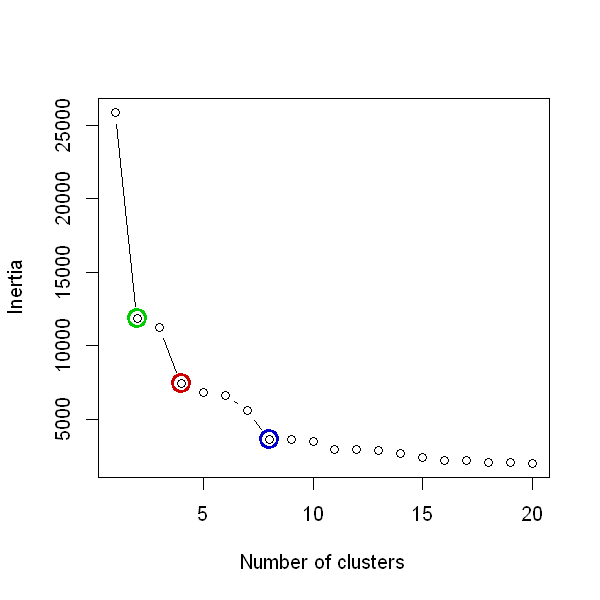

In [8]:
#------------------------------------------------------------
options(repr.plot.width=5, repr.plot.height= 5)
# represent the jumps of inertia of the dedrogram according to the number of selected classes.
inertie <- sort(clusterward1$height, decreasing = TRUE)
plot(inertie[1:20], type = "b", xlab = "Number of clusters", ylab = "Inertia")
points(c(2, 4, 8), inertie[c(2, 4, 8)], col = c("green3", "red3", "blue3"), cex = 2, lwd=3)

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

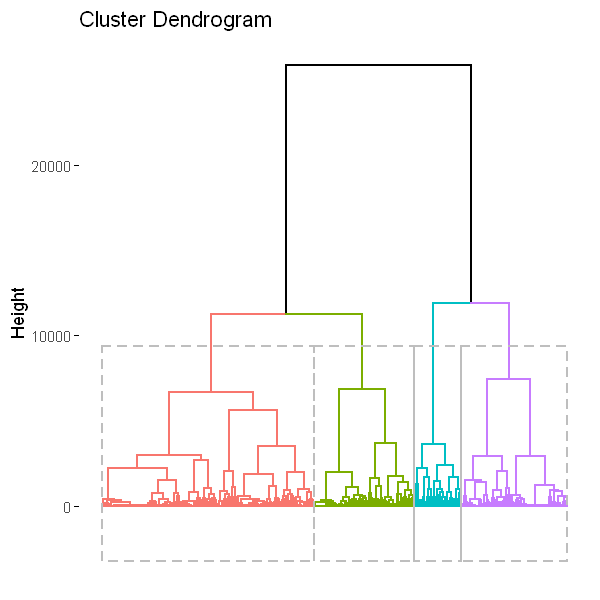

In [9]:
#------------------------------------------------------------
# We choose a number of 4 clusters 
library(factoextra)
fviz_dend(clusterward1, k = 4, show_labels = FALSE, rect = TRUE)

*Typologies of sequences*

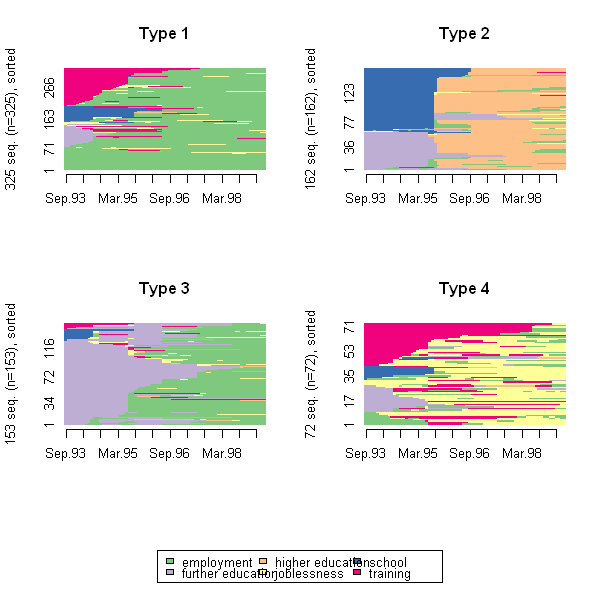

In [10]:
cl1.4 <- cutree(clusterward1, k = 4)
cl1.4fac <- factor(cl1.4, labels = paste("Type", 1:4))
#Plot all the sequences within each cluster.
seqIplot(mvad.seq, group = cl1.4fac, sortv = "from.start")

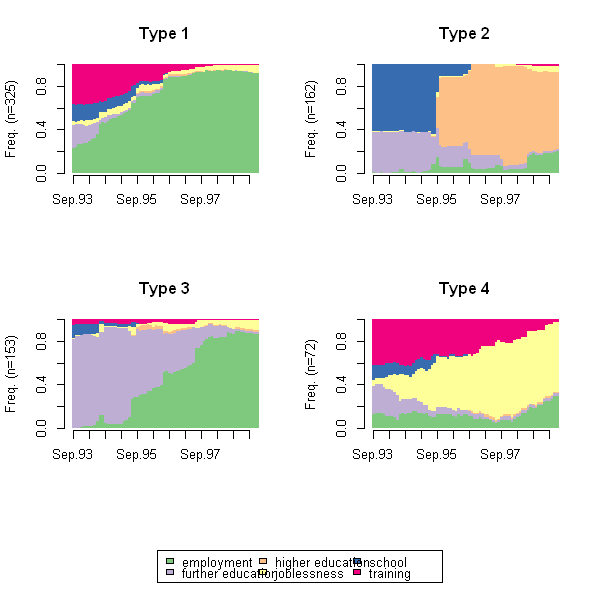

In [11]:
#Plot the state distribution within each cluster.
seqdplot(mvad.seq, group = cl1.4fac, border = NA)

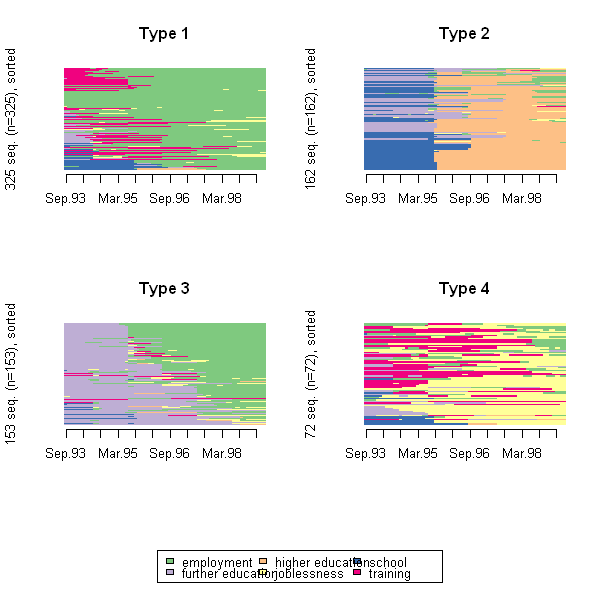

In [12]:
# sort the sequences by Multidimensional scaling to make the mats more readable
ordre <- cmdscale(as.dist(dist.om1), k = 1)
seqIplot(mvad.seq, group = cl1.4fac, sortv = ordre,  space = 0, border = NA, yaxis = FALSE)

*Most representative sequences of each cluster*

 [!!] In IRkernel::main() : cex.plot is deprecated, use cex.axis instead.
 [>] number of objects (sum of weights): 325
 [>] max. distance: 139.89
 [>] neighborhood radius: 13.99
 [>] 1 representative(s) selected, coverage=30% (threshold=25%)
 [>] 210 distinct sequence(s)
 [>] number of objects (sum of weights): 162
 [>] max. distance: 139.89
 [>] neighborhood radius: 13.99
 [>] 1 representative(s) selected, coverage=30% (threshold=25%)
 [>] 96 distinct sequence(s)
 [>] number of objects (sum of weights): 153
 [>] max. distance: 139.89
 [>] neighborhood radius: 13.99
 [>] 1 representative(s) selected, coverage=36% (threshold=25%)
 [>] 116 distinct sequence(s)
 [>] number of objects (sum of weights): 72
 [>] max. distance: 139.89
 [>] neighborhood radius: 13.99
 [>] 4 representative(s) selected, coverage=28% (threshold=25%)
 [>] 68 distinct sequence(s)


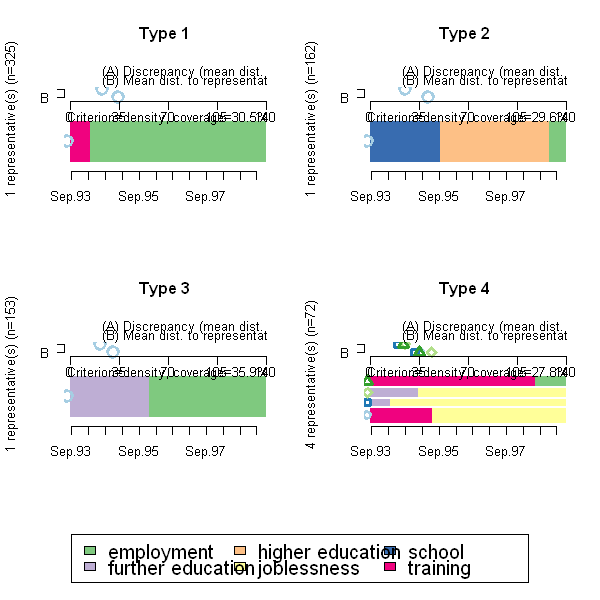

In [13]:
#Plot the representative sequences of each cluster.
seqrplot(mvad.seq, diss = dist.om1, group = cl1.4fac, #criterion = "dist",
    border = NA,cex.legend = 1.5, cex.plot = 5)

Warning message in plot.window(...):
""labcol" n'est pas un paramètre graphique"Warning message in plot.xy(xy, type, ...):
""labcol" n'est pas un paramètre graphique"Warning message in title(...):
""labcol" n'est pas un paramètre graphique"

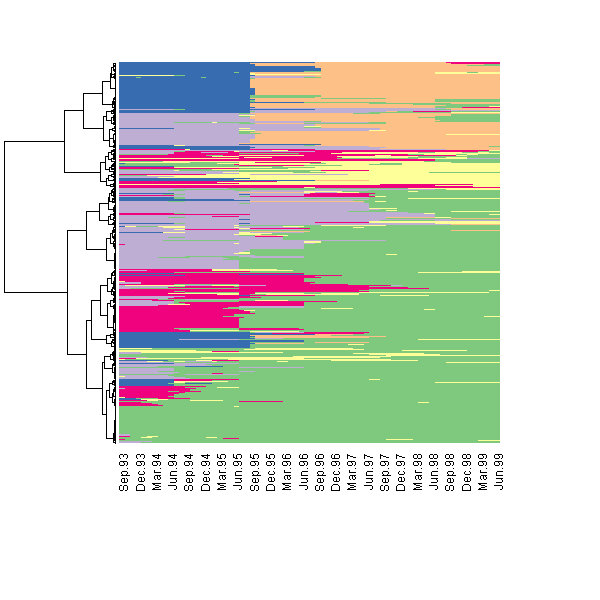

In [14]:
#heatmap
seq_heatmap(mvad.seq, clusterward1,labcol=17:86)

In [15]:
# size of classes
table(cl1.4)

cl1.4
  1   2   3   4 
325 162 153  72 

**KMedoids Algorithm**

In [16]:
MedoidClust <- wcKMedoids(dist.om1, k=4, initialclust=cl1.4) # choice of k=4 clusters 
# Contingency table: comparison with hierarchical clustering
table(cl1.4, MedoidClust$clustering)

     
cl1.4  32  60 117 510
    1   6 298  17   4
    2 128   0  33   1
    3   0   0 153   0
    4   1   4   8  59

*Typologies of sequences*

 [>] Using k=71 frequency groups
 [>] Pseudo/median-based-R2: 0.6327274
 [>] Pseudo/median-based-F statistic: 15.77568


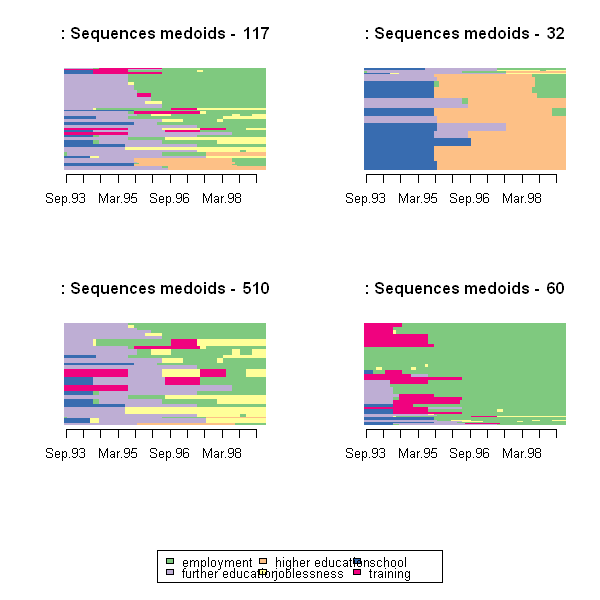

In [17]:
# Typologies 
MedoidClust.4 <- as.numeric(as.factor(MedoidClust$clustering))
seqplot.rf(mvad.seq, diss=dist.om1, group=MedoidClust$clustering,which.plot="medoids")

*Medoids:*

[1]  32  60 117 510

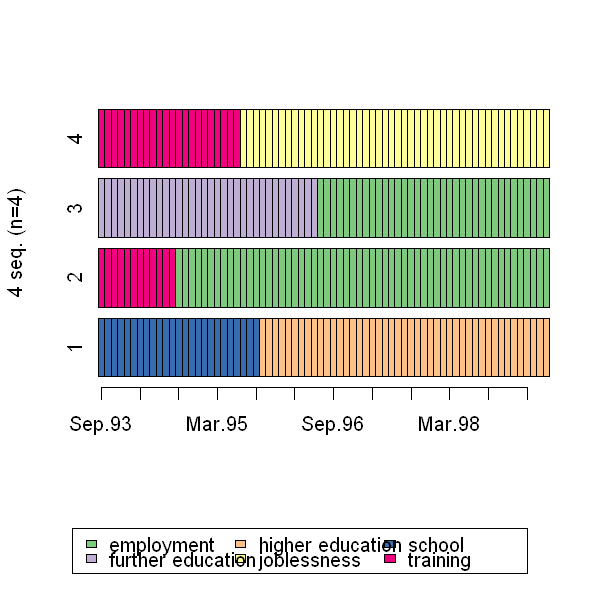

In [18]:
medoid_index= sort(unique(MedoidClust$clustering))
medoid_index
seqplot(mvad.seq[medoid_index,], idxs=as.vector(medoid_index))

*Visualizing clusters*

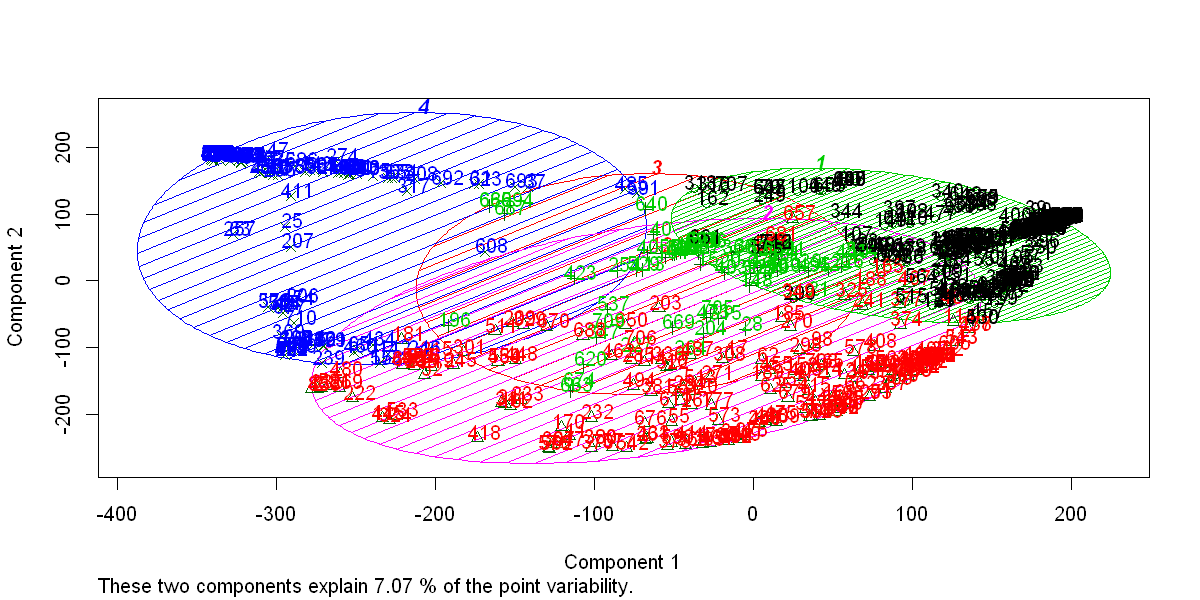

In [19]:
Pam <- pam(x = dist.om1, k=4, diss=TRUE) #another way to apply KMedoids algorithm
options(repr.plot.width=10, repr.plot.height=5)
clusplot(dist.om1,Pam$clustering,diss=TRUE,labels=2,color=TRUE,
         col.txt=Pam$clustering, shade=T ,main="")

*Visualize silhouhette information*

  cluster size ave.sil.width
1       1  302          0.46
2       2  211          0.18
3       3   64          0.29
4       4  135          0.57


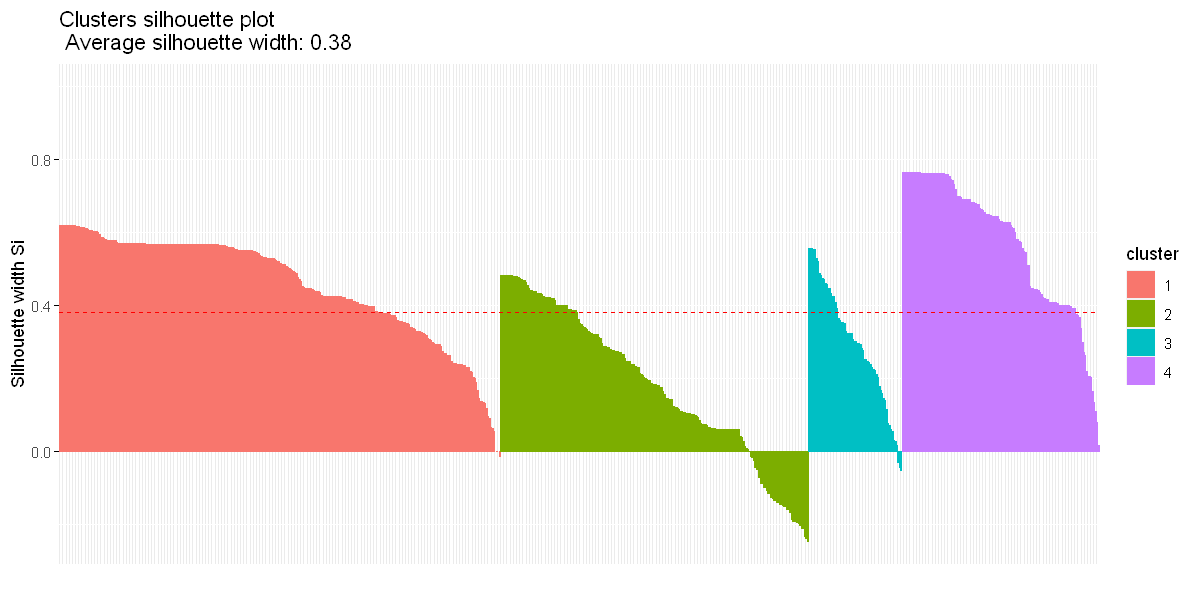

In [20]:
fviz_silhouette(Pam)

## Stability Study

### Resampling without replacement

In [21]:
#library(fossil)
ResamplingWR <- function(NbSamples=3, K=2:5, SizeResampling=300, index=0,
                         ClusterAlgo, distance){ 
#ClusterAlgo: "KMedoids" or "Hierarchical Clustering"
#index=0 for Rand and 1 for Variation of Information
    
  dfR <- matrix(nrow = length(K), ncol = NbSamples)
  dfVI <- matrix(nrow = length(K), ncol = NbSamples)
  il=1 #row incrementer in df 
  mean.index.rand <- rep(0,length(K))
  mean.index.vi <- rep(0,length(K))
  for (k in K){
    if (ClusterAlgo == "KMedoids"){
      clusterOrigin <- pam(distance,k,diss=T)$clustering  #clustering in full dataset
    }
    if (ClusterAlgo == "Hierarchical Clustering"){
      clusterOrigin <- cutree(hclust(dist(distance), method = "ward.D2"), k) #clustering in full dataset
    }
    for (b in 1:NbSamples){
      #build resamples 
      isample <- sample(1:nrow(mvad.seq), size=SizeResampling)  
      dist.sample <- distance[isample,isample]
      #clustering the resamples 
      if (ClusterAlgo == "KMedoids"){
        clusters.sample <- pam(x = dist.sample, k, diss=T)$clustering 
      }
      if (ClusterAlgo== "Hierarchical Clustering"){
        clusters.sample <- cutree(hclust(dist(dist.sample), method = "ward.D2"), k)
      }
      # computing indexes between clustering on full dataset and clustering on resamples 
      dfR[il,b] <- rand.index(clusterOrigin[isample],clusters.sample)
      dfVI[il,b] <- vi.dist(clusterOrigin[isample],
                            clusters.sample, parts = FALSE)
    }
    #compute the mean of indexes for the b resamples 
    mean.index.rand[il] <- mean(dfR[il,])
    mean.index.vi[il]<- mean(dfVI[il,])
    il= il + 1
  }
  dfR <-  data.frame(dfR,mean.index.rand )
  dfVI <-  data.frame(dfVI,mean.index.vi )
  rownames(dfR) <- paste("K=",K) 
  rownames(dfVI) <- paste("K=",K)
  colnames(dfR) <- c(paste("Subsample",1:NbSamples, sep=""),"meanRand")
  colnames(dfVI) <- c(paste("Subsample",1:NbSamples, sep=""),"meanVI")
  
  if (index==0){return (dfR)}
  if (index==1) {return (dfVI)}
  
}

In [22]:
ResamplingWR(distance = dist.om1, ClusterAlgo = "KMedoids", index = 0)

,Subsample1,Subsample2,Subsample3,meanRand
K= 2,1.0000000,0.9933333,0.9867113,0.9933482
K= 3,0.8785507,0.9946265,1.0000000,0.9577258
K= 4,0.8627648,0.9868673,0.8547380,0.9014567
K= 5,0.9080936,0.8423634,0.9765663,0.9090078


In [23]:
PlotResamplingWR <- function(K=1:7, SizeResampling, NbSamples=5,ClusterAlgo, distance){
  
  plot_df <- data.frame(K, Rand= ResamplingWR(NbSamples,K, SizeResampling, 
                                              index=0,ClusterAlgo, distance)$meanRand, 
                        VI= ResamplingWR(NbSamples,K, SizeResampling,
                                         index=1,ClusterAlgo, distance)$meanVI )
  
  fig <- ggplot(plot_df, aes(x = K)) + geom_line( aes(x = K,y=Rand,color="Rand"))+ 
    geom_line(aes(x=K, y=VI, color= "VI"))+ ylab("Indicator")+
    labs(title=paste("Size of samples: ", SizeResampling))+
    scale_color_manual(values= c("Rand"= "darkblue","VI"= "orange"))+
    theme(plot.title = element_text(hjust=0.5,color="blue",size=10,face="bold"))
  
  return (fig)
  
}

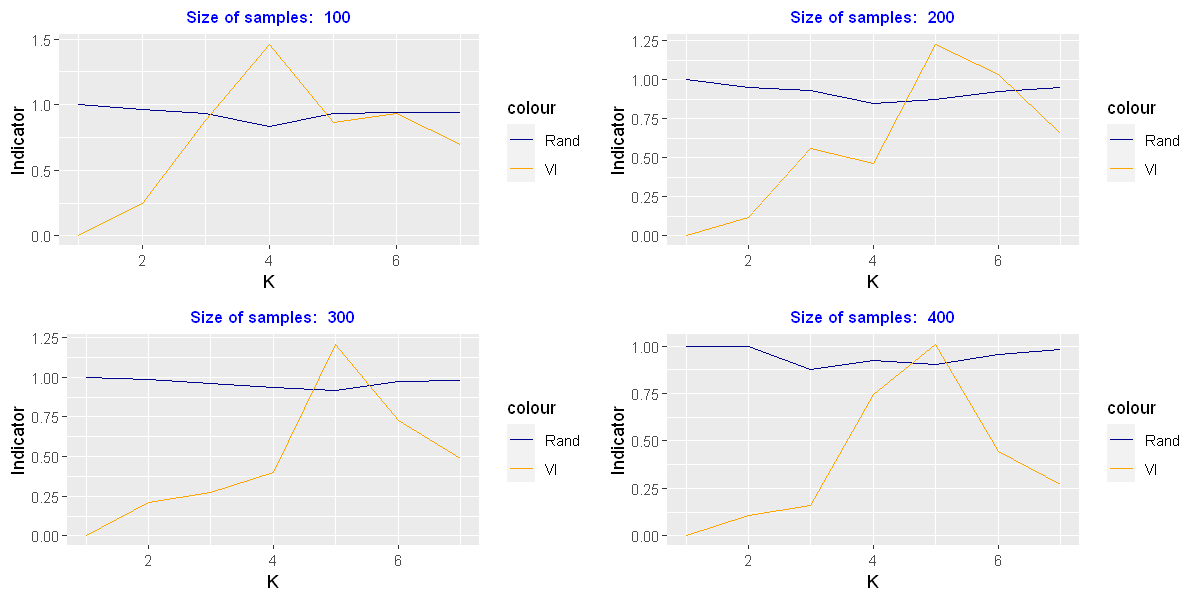

In [24]:

fig1 <- PlotResamplingWR(K=1:7, SizeResampling = 100, NbSamples=5,
                               ClusterAlgo ="KMedoids" ,
                               distance = dist.om1)
fig2 <- PlotResamplingWR(K=1:7, SizeResampling = 200, NbSamples=5,
                               ClusterAlgo = "KMedoids" ,
                               distance = dist.om1)
fig3 <- PlotResamplingWR(K=1:7, SizeResampling = 300, NbSamples=5,
                               ClusterAlgo ="KMedoids",
                               distance = dist.om1)
fig4 <- PlotResamplingWR(K=1:7, SizeResampling = 400, NbSamples=5,
                               ClusterAlgo = "KMedoids", 
                               distance= dist.om1)
grid.arrange(fig1, fig2, fig3, fig4, ncol=2 ) 

### Boostraping 

In [50]:
library(WeightedCluster)
pamRange <- wcKMedRange(dist.om1, 2:7)
bcq2 <- seqnullcqi(mvad.seq, pamRange, R=10, model=c("combined"),
seqdist.args=list(method="OM", sm='TRATE'), 
kmedoid = TRUE)
# Print the results
bcq2
## Different kind of plots
plot(bcq2, stat="ASW", type="line")
plot(bcq2, stat="ASW", type="density")
plot(bcq2, stat="ASW", type="boxplot")

ERROR: Error in seqnullcqi(mvad.seq, pamRange, R = 10, model = c("combined"), : impossible de trouver la fonction "seqnullcqi"


### JACKNIFE: Identification and study of unstable individuals

**! Exécution longue pour cette partie**

In [30]:
jackseq=list()
dist_jk<-list()

nrowseq=nrow(mvad.seq)
ijack<-matrix(nrow=nrowseq,ncol=nrowseq-1) 
for (i in 1:nrowseq) {
    jackseq[[i]]=mvad.seq[setdiff(1:nrowseq,i),] 
    dist_jk[[i]]=dist.om1[setdiff(1:nrowseq,i),setdiff(1:nrowseq,i)]
}

In [31]:
K=c(4,5,6,8)
NbSamples=nrowseq
dfR <- matrix(nrow = length(K), ncol = NbSamples)
dfVI <- matrix(nrow = length(K), ncol = NbSamples)

mean.index.vi <- rep(0,length(K))
mean.index.rand <- rep(0,length(K))
il=1

for (k in K){
    clusterO<- pam(dist.om1,k,diss=T)$clustering
    for (b in 1:NbSamples){

      clusterOrigin<-clusterO[setdiff(1:712,b)]
      clusters.jk <- pam(x = dist_jk[[b]], k, diss=T)$clustering

      dfR[il,b] <- rand.index(clusterOrigin,clusters.jk)

      dfVI[il,b] <- vi.dist(clusterOrigin, clusters.jk, parts = FALSE)
    }
    il=il+1
    
}

x,mean.cluster.rand,mean.cluster.vi
4,0.010000000,3.598869e-16
5,0.009995968,7.949401e-03
6,0.009997003,6.089078e-03
8,0.009999941,1.678860e-04


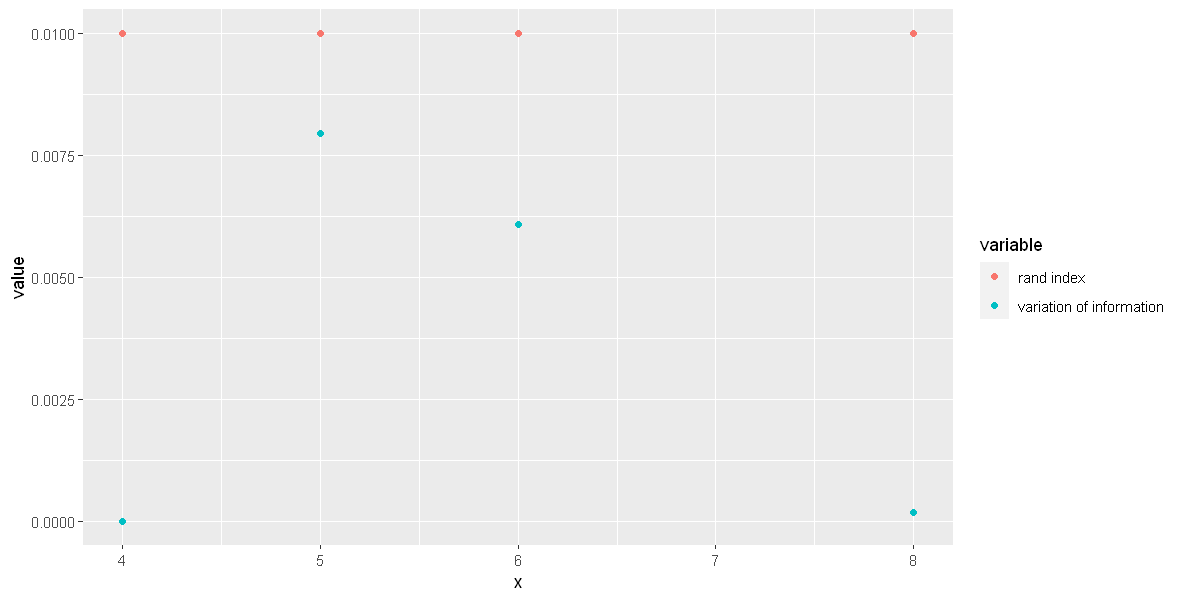

In [32]:
mean.cluster.vi<-rep(0,length(K))
mean.cluster.rand<-rep(0,length(K))
for(i in 1:length(K)){
mean.cluster.vi[i]<-mean(dfVI[i,])
mean.cluster.rand[i]<-mean(dfR[i,])/100} #on divise par 100 pour avoir la meme echelle et pouvoir choisir le meilleur cluster

df <- data.frame(x=K, mean.cluster.rand, mean.cluster.vi)
df
ggplot(df, aes(x, y = value, color = variable)) + 
    geom_point(aes(y = mean.cluster.rand, col = "rand index")) + 
    geom_point(aes(y = mean.cluster.vi, col = "variation of information"))

In [33]:
mean.index.vi <- rep(0,712)
mean.index.rand <- rep(0,712)
for(i in 1:712){
mean.index.vi[i]<-mean(dfVI[,i])
mean.index.rand[i]<-mean(dfR[,i])}

x,dfR.1..n1.n2.,dfVI.1..n1.n2.,dfR.2..n1.n2.,dfVI.2..n1.n2.,dfR.3..n1.n2.,dfVI.3..n1.n2.,dfR.4..n1.n2.,dfVI.4..n1.n2.
1,1,4.440892e-16,1.0000000,0.000000e+00,1.0000000,0.000000e+00,1,0
2,1,4.440892e-16,1.0000000,8.881784e-16,1.0000000,0.000000e+00,1,0
3,1,4.440892e-16,1.0000000,8.881784e-16,1.0000000,-8.881784e-16,1,0
4,1,4.440892e-16,1.0000000,8.881784e-16,1.0000000,0.000000e+00,1,0
5,1,0.000000e+00,1.0000000,0.000000e+00,1.0000000,0.000000e+00,1,0
6,1,4.440892e-16,1.0000000,8.881784e-16,1.0000000,0.000000e+00,1,0
7,1,4.440892e-16,1.0000000,8.881784e-16,1.0000000,-8.881784e-16,1,0
8,1,4.440892e-16,1.0000000,8.881784e-16,1.0000000,-8.881784e-16,1,0
9,1,4.440892e-16,0.9945366,1.075066e-01,0.9959272,8.251558e-02,1,0
10,1,4.440892e-16,1.0000000,0.000000e+00,1.0000000,0.000000e+00,1,0


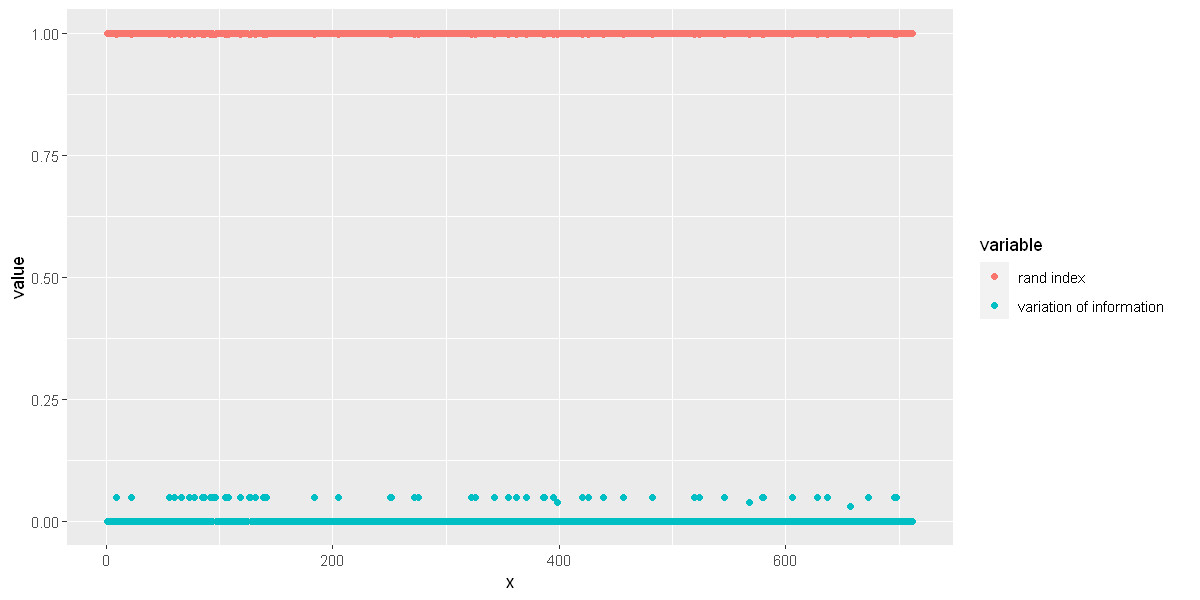

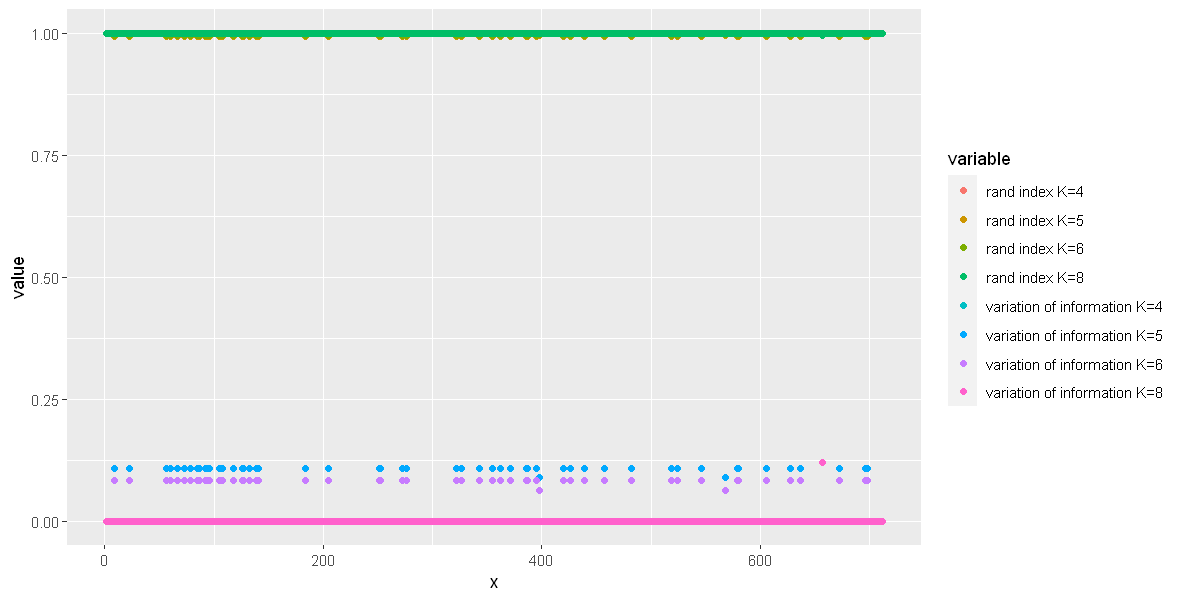

In [34]:
library(ggplot2)
n1=1
n2=712

df <- data.frame(x=n1:n2, mean.index.rand[n1:n2], mean.index.vi[n1:n2])
ggplot(df, aes(x, y = value, color = variable)) + 
    geom_point(aes(y = mean.index.rand[n1:n2], col = "rand index")) + 
    geom_point(aes(y = mean.index.vi[n1:n2], col = "variation of information"))


df <- data.frame(x=n1:n2, dfR[1,n1:n2], dfVI[1,n1:n2],dfR[2,n1:n2], dfVI[2,n1:n2],dfR[3,n1:n2], dfVI[3,n1:n2],dfR[4,n1:n2], dfVI[4,n1:n2])
df
ggplot(df, aes(x, y = value, color = variable)) + 
    geom_point(aes(y = dfR[1,n1:n2], col = "rand index K=4")) + 
    geom_point(aes(y = dfVI[1,n1:n2], col = "variation of information K=4"))+
    geom_point(aes(y = dfR[2,n1:n2], col = "rand index K=5")) + 
    geom_point(aes(y = dfVI[2,n1:n2], col = "variation of information K=5"))+ 
                 geom_point(aes(y = dfR[3,n1:n2], col = "rand index K=6")) + 
    geom_point(aes(y = dfVI[3,n1:n2], col = "variation of information K=6")) +
                 geom_point(aes(y = dfR[4,n1:n2], col = "rand index K=8")) + 
    geom_point(aes(y = dfVI[4,n1:n2], col = "variation of information K=8"))

In [36]:
#Pour K=4
#nbre d'individus pour lesquels rand varie
lenindvar<-length(which(mean.index.rand<1))
print("length?")
lenindvar
#individus pour lesquels le rand varie
indvar<-which(mean.index.rand<1)
print("Who are they? =")
indvar
print("What are their clusters? =")
pam(x = dist.om1, 4, diss=T)$clustering[indvar]
#On retrouve le medoid d'indice 60 du clustering k medoids k=4
#presque tous sont dans le meme cluster que 60

[1] "length?"


[1] 54

[1] "Who are they? ="


[1]   9  22  56  60  66  73  78  85  87  92  95  96 105 108 118 126 127 132 139
[20] 141 184 205 251 252 272 276 322 326 343 355 362 371 386 387 395 398 420 426
[39] 439 457 482 519 524 546 568 579 580 606 628 637 657 673 696 698

[1] "What are their clusters? ="


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1

#### Logistic regression

Cluster characterization

 [>] Using k=24 frequency groups
 [>] Pseudo/median-based-R2: 0.6335349
 [>] Pseudo/median-based-F statistic: 16.91191
 [>] Using k=5 frequency groups
 [>] Pseudo/median-based-R2: 0.2943112
 [>] Pseudo/median-based-F statistic: 5.108927


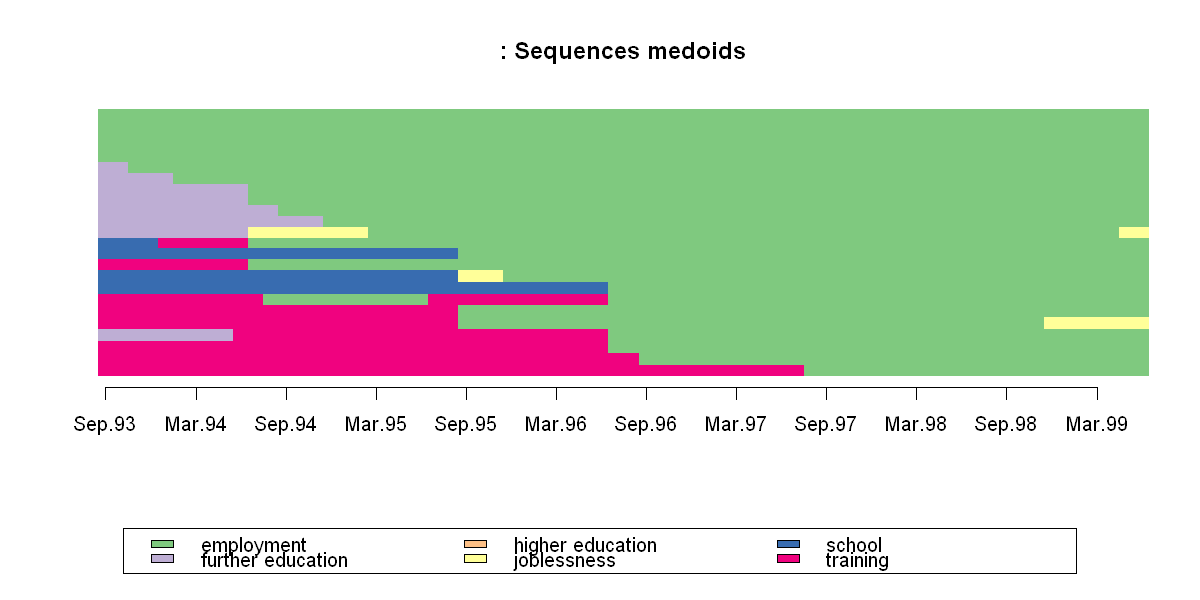

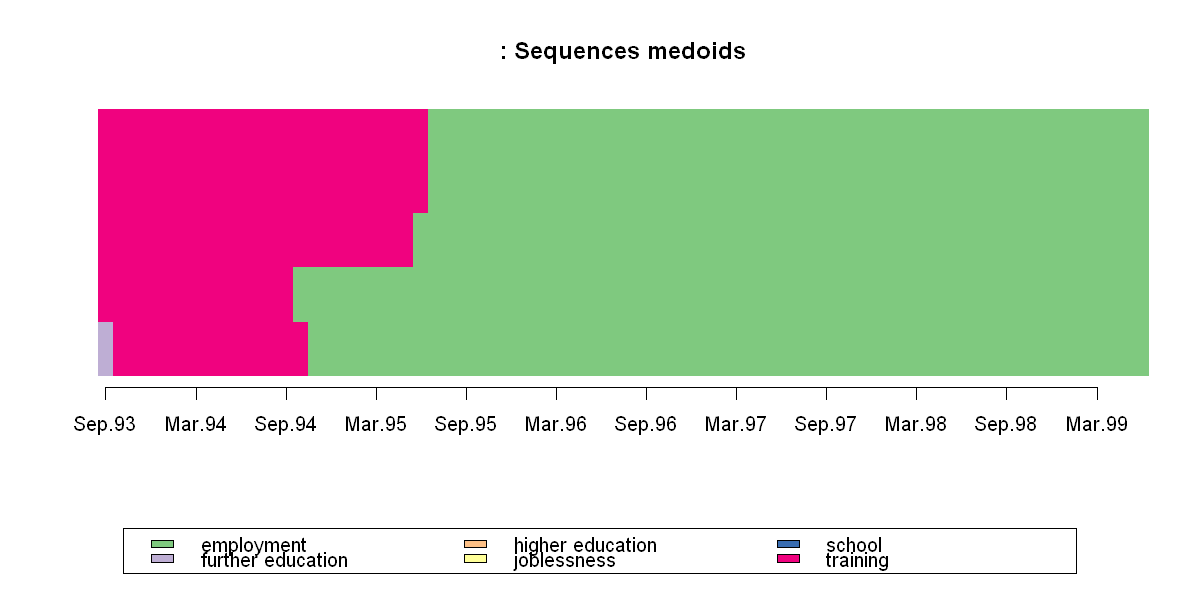

In [37]:
clustint<-which(MedoidClust.4==2)
par(mfrow=c(1,2))
#individu du cluster de medoid 60 qui ne font pas varier l'information
seqplot.rf(mvad.seq[setdiff(clustint,indvar),],diss=dist.om1[setdiff(clustint,indvar),setdiff(clustint,indvar)],which.plot="medoids")
#individu du cluster de medoid 60 qui font varier l'information
seqplot.rf(mvad.seq[indvar,],diss=dist.om1[indvar,indvar],which.plot="medoids")

In [39]:
#clustint
gvi<-ifelse(clustint %in% indvar,FALSE,TRUE)
#mb4
#glm.cl4 <- glm(mb4 ~ male + funemp + gcse5eq, data = mvad,family = "binomial")
glm.gvi <- glm(gvi ~ male+catholic+Belfast+ N.Eastern+ Southern+S.Eastern+Grammar+funemp+gcse5eq+fmpr+livboth, data = mvad[clustint,],family = "binomial")
summary(glm.gvi)


Call:
glm(formula = gvi ~ male + catholic + Belfast + N.Eastern + Southern + 
    S.Eastern + Grammar + funemp + gcse5eq + fmpr + livboth, 
    family = "binomial", data = mvad[clustint, ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3848   0.4174   0.5431   0.7055   0.9659  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.96451    0.58790   3.342 0.000833 ***
maleyes       0.25873    0.32885   0.787 0.431415    
catholicyes   0.28340    0.34472   0.822 0.411003    
Belfastyes   -0.75359    0.59470  -1.267 0.205096    
N.Easternyes -0.70571    0.55748  -1.266 0.205551    
Southernyes   0.01713    0.60250   0.028 0.977324    
S.Easternyes -0.77109    0.65365  -1.180 0.238131    
Grammaryes   -0.03133    0.50064  -0.063 0.950109    
funempyes    -0.38063    0.41587  -0.915 0.360054    
gcse5eqyes    0.58708    0.49876   1.177 0.239166    
fmpryes      -0.19601    0.43807  -0.447 0.654555    
livbothyes   -0.30997    0.32646

In [51]:
#exp(coefficients(glm.gvi))
#exp(confint(glm.gvi))

### Influence of time step

In [55]:
### Regrouping the data by quarter by choosing the most frequent state in the quarter

newcol<-as.integer(linspace(1,70,23.33))[1:23]
lin=nrow(mvad.seq);col=ncol(mvad.seq)

indiv=matrix(0,ncol=23,nrow=lin)
for(i in 1:lin){
  maxi=matrix(0,nrow=6,ncol=23)
  for(k in 1:length(newcol)){
    for(j in newcol[k]:newcol[k]+2){
      if(mvad.seq[i,j]=='EM'){maxi[1,k]=maxi[1,k]+1}
      else if(mvad.seq[i,j]=='FE'){maxi[2,k]=maxi[2,k]+1}
      else if(mvad.seq[i,j]=='HE'){maxi[3,k]=maxi[3,k]+1}
      else if(mvad.seq[i,j]=='JL'){maxi[4,k]=maxi[4,k]+1}
      else if(mvad.seq[i,j]=='SC'){maxi[5,k]=maxi[5,k]+1}
      else if(mvad.seq[i,j]=='TR'){maxi[6,k]=maxi[6,k]+1}
    }
    indiv[i,k]=mvad.scodes[as.numeric(which.max(maxi[,k]))]
  }
  
}
newmvad<-cbind(indiv,mvad.scodes[mvad.seq[,col]])
mvadnew<-as.data.frame(newmvad)

colnames(mvadnew)=c("Autumn93","Winter93","Spring94","Summer94","Autumn94","Winter94",
                    "Spring95","Summer95","Autumn95","Winter95",
                    "Spring96","Summer96","Autumn96","Winter96",
                    "Spring97","Summer97","Autumn97","Winter97","Spring98","Summer98","Autumn98","Winter98",
                    "Spring99","Summer99")


In [58]:
mvad.tri2.seq <- seqdef(mvadnew) 
dist.om.tri2 <- seqdist(mvad.tri2.seq, method = "OM", indel = 1, sm = "TRATE")

 [>] 6 distinct states appear in the data: 
     1 = EM
     2 = FE
     3 = HE
     4 = JL
     5 = SC
     6 = TR
 [>] state coding:
       [alphabet]  [label]  [long label] 
     1  EM          EM       EM
     2  FE          FE       FE
     3  HE          HE       HE
     4  JL          JL       JL
     5  SC          SC       SC
     6  TR          TR       TR
 [>] 712 sequences in the data set
 [>] min/max sequence length: 24/24
 [>] 712 sequences with 6 distinct states
 [>] Computing sm with seqcost using  TRATE
 [>] creating substitution-cost matrix using transition rates ...
 [>] computing transition probabilities for states EM/FE/HE/JL/SC/TR ...
 [>] 409 distinct  sequences 
 [>] min/max sequence lengths: 24/24
 [>] computing distances using the OM metric
 [>] elapsed time: 0.23 secs


In [104]:
TimeInfluence <- function(K=3:6){
   dfR <- matrix(nrow = length(K), ncol = 1) 
   dfVI <- matrix(nrow = length(K), ncol = 1) 
   il=1 #row incrementor in df  
   
   for (k in K){
     clusterMonth <- pam(dist.om1,k,diss=TRUE)$clustering #monthly data
     clusterQuarter <- pam(dist.om.tri2,k,diss=TRUE)$clustering #quarterly data
     
     dfR[il,1] <- rand.index(clusterMonth,clusterQuarter)
     dfVI[il,1] <- vi.dist(clusterMonth,clusterQuarter,parts = FALSE)
       
     il=il+1
   }
   return (list(dfR= dfR,dfVI= dfVI))
}


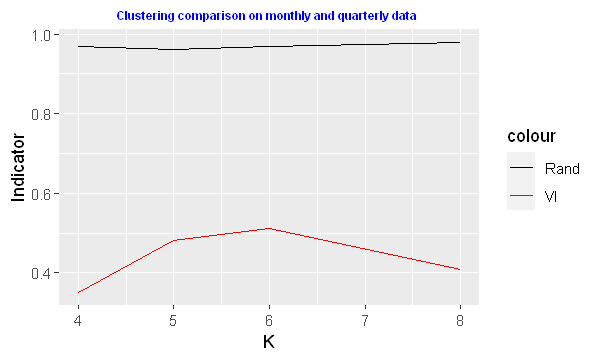

In [112]:
options(repr.plot.width=5, repr.plot.height=3)
df1 <- data.frame(K, TimeInfluence() )
fig1 <- ggplot(df1, aes(x = K)) +
    geom_line( aes(x = K,y=dfR,color="Rand"))+ 
    geom_line(aes(x=K, y=dfVI, color= "VI"))+ ylab("Indicator")+
    labs(title="Clustering comparison on monthly and quarterly data ")+
    scale_color_manual(values= c("Rand"= "black","VI"= "red"))+
    theme(plot.title = element_text(hjust=0.5,color="blue",size=7,face="bold"))

fig1

In [101]:
TimeInfluenceResampling <- function(K=3:6, SizeResampling=300){
   #monthly data
   df1R <- matrix(nrow = length(K), ncol = 1) 
   df1VI <- matrix(nrow = length(K), ncol = 1) 
   
   #quarterly data
   df2R <- matrix(nrow = length(K), ncol = 1) 
   df2VI <- matrix(nrow = length(K), ncol = 1)
   
   il=1 #row incrementor in df  
   
   for (k in K){
     clusterOrigin1 <- pam(dist.om1,k,diss=TRUE)$clustering #monthly
     clusterOrigin2 <- pam(dist.om.tri2,k,diss=TRUE)$clustering #quarterly
     
     #same sample for the two kind of data
     isample <- sample(1:nrow(mvad.seq), size=SizeResampling) 
     dist1.sample <- dist.om1[isample,isample]
     dist2.sample <- dist.om.tri2[isample,isample]
    
     clusters.sample1 <- pam(x = dist1.sample, k, diss=TRUE)$clustering
     clusters.sample2 <- pam(x = dist2.sample, k, diss=TRUE)$clustering
     
     df1R[il,1] <- rand.index(clusterOrigin1[isample],clusters.sample1)
     df1VI[il,1] <- vi.dist(clusterOrigin1[isample],
                             clusters.sample1, parts = FALSE)
     
     df2R[il,1] <- rand.index(clusterOrigin2[isample],clusters.sample2)
     df2VI[il,1] <- vi.dist(clusterOrigin2[isample],
                             clusters.sample2, parts = FALSE)
     
     il=il+1
     
   }
   
   return (list(df1R= df1R,df1VI= df1VI,df2R= df2R,df2VI= df2VI))
}


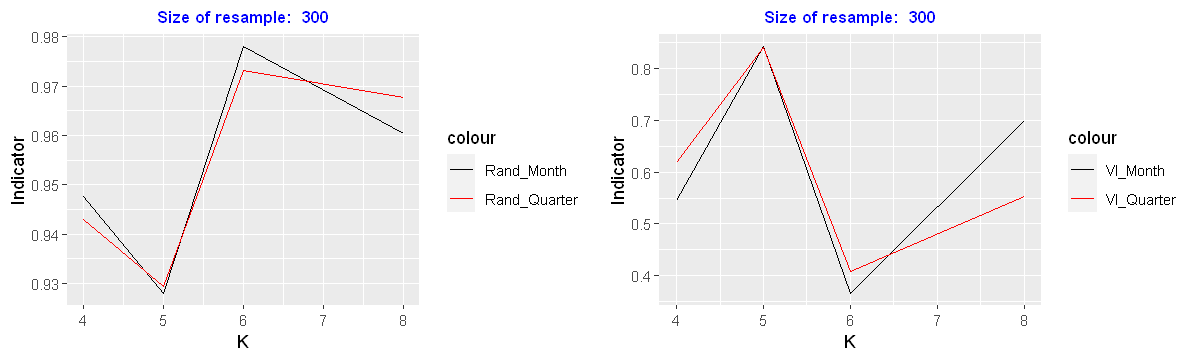

In [123]:
options(repr.plot.width=10, repr.plot.height=3)
SizeResampling= 300
df <- data.frame(K, TimeInfluenceResampling(K, SizeResampling) )
fig1 <- ggplot(df, aes(x = K)) +
    geom_line( aes(x = K,y=df1R,color="Rand_Month"))+ 
    geom_line(aes(x=K, y=df2R, color= "Rand_Quarter"))+ ylab("Indicator")+
    labs(title=paste("Size of resample: ", SizeResampling))+
    scale_color_manual(values= c("Rand_Month"= "black","Rand_Quarter"= "red"))+
    theme(plot.title = element_text(hjust=0.5,color="blue",size=10,face="bold"))

fig2 <- ggplot(df, aes(x = K)) +
    geom_line( aes(x = K,y=df1VI,color="VI_Month"))+ 
    geom_line(aes(x=K, y=df2VI, color= "VI_Quarter"))+ ylab("Indicator")+
    labs(title=paste("Size of resample: ", SizeResampling))+
    scale_color_manual(values= c("VI_Month"= "black","VI_Quarter"= "red"))+
    theme(plot.title = element_text(hjust=0.5,color="blue",size=10,face="bold"))

grid.arrange(fig1, fig2, ncol=2 ) 